In [98]:
import os
import cv2
import json
import base64

import random
import requests
import numpy as np
import pandas as pd

from IPython.display import display

In [123]:
def image_show(img):
    
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret,width = 800)
    IPython.display.display(i)

def display_response_dataframe(response):
    
    # Get a list of unique keys in the dictionaries
    response_list = response["Response"]
    keys = list(set().union(*(d.keys() for d in response_list)))

    # Create the DataFrame with the specified columns
    df = pd.DataFrame(response_list, columns=keys)

    # Display the dataframe
    display(df)

def plot_prediction_resposne(image, response):
    
    # Assume the base64-encoded image is stored in a variable called image_b64
    # Decode the base64 string into bytes
    prediction_image_bytes = base64.b64decode(response['Imageb64'])

    # # Convert the bytes into a NumPy array
    prediction_image_array = np.frombuffer(prediction_image_bytes, dtype=np.uint8)

    # Reshape it to the Original Image Size
    prediction_image_array = np.reshape(prediction_image_array, image.shape) 

    # Fix Color Channel Issue
    prediction_image = cv2.cvtColor(prediction_image_array , cv2.COLOR_BGR2RGB)
            
    image_show(prediction_image)
    
def response_show(image, response):
    
    print("YoloV8 Segmentation Image Output:")
    plot_prediction_resposne(image, response)
    
    print("\n YoloV8 Segmentation DataFrame Output:")
    display_response_dataframe(response)

In [124]:
path_to_images = r"C:\Users\majmo\Git\ml_demystified\workshop\computer_vision\training\data\test\images"
image_name = random.choice(os.listdir(path_to_images))

image = cv2.imread(os.path.join(path_to_images, image_name))

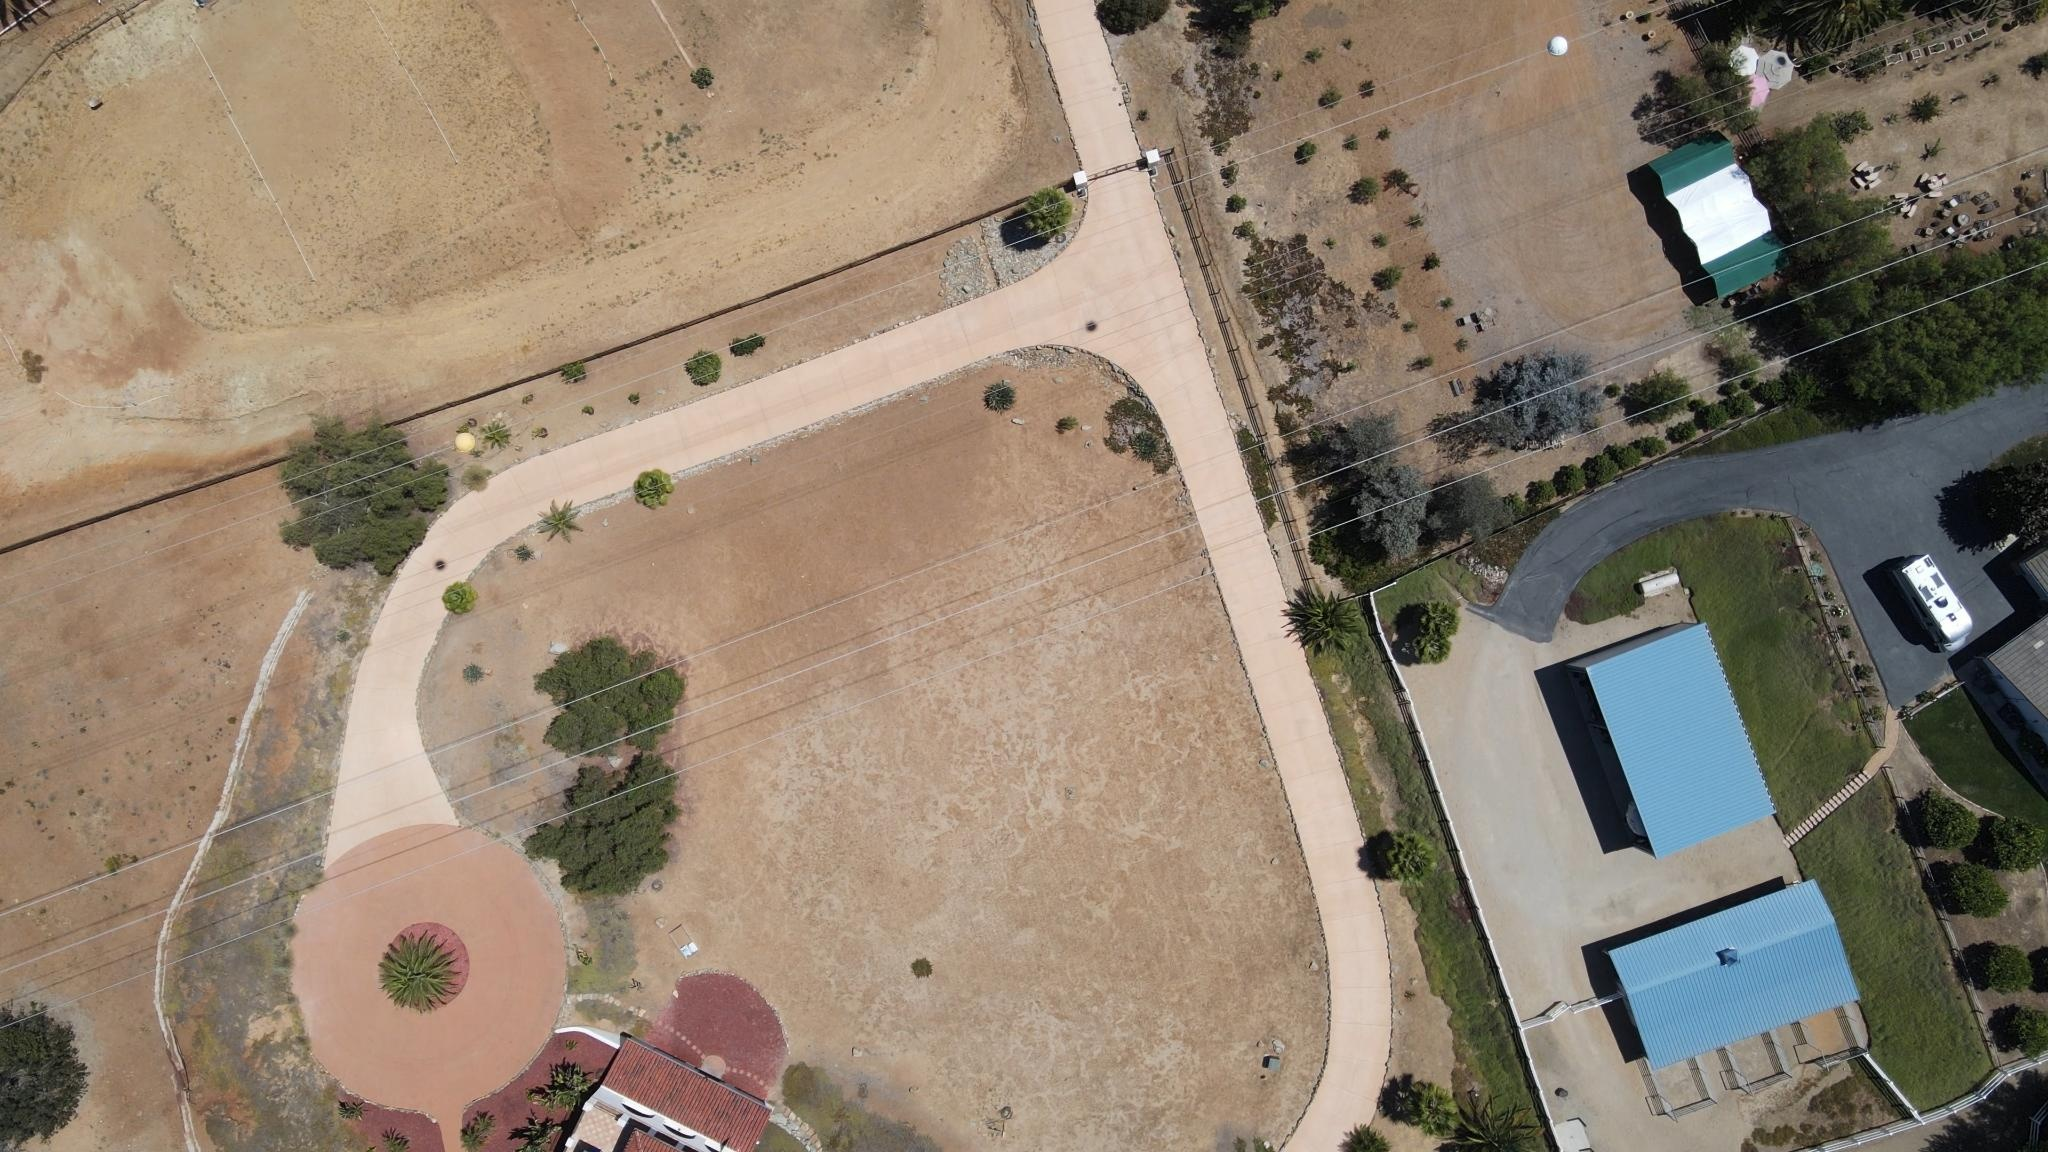

In [125]:
image_show(image)

In [126]:
# defining the api-endpoint
def spad_api_call(image: np.array):
    
    try:
        url = f"http://127.0.0.1:2023/spad/predict"
        api_key = "4DGn!CK6ET6%7xB&eiqdtk"       
        image_byte = cv2.imencode(".jpg", image)[1].tobytes()
        b64_image = base64.b64encode(image_byte)
        image_json_body  = {'Imageb64': b64_image.decode()}
        proxies = { 'http': None }
        headers = {'API-KEY': api_key, 'content-type': 'application/json'}
        resposne = requests.post(url, json=image_json_body, proxies=proxies, headers=headers)
        return json.loads(resposne.text)
    
    except Exception as e:
        print(str(e))

In [127]:
response = spad_api_call(image)

YoloV8 Segmentation Image Output:


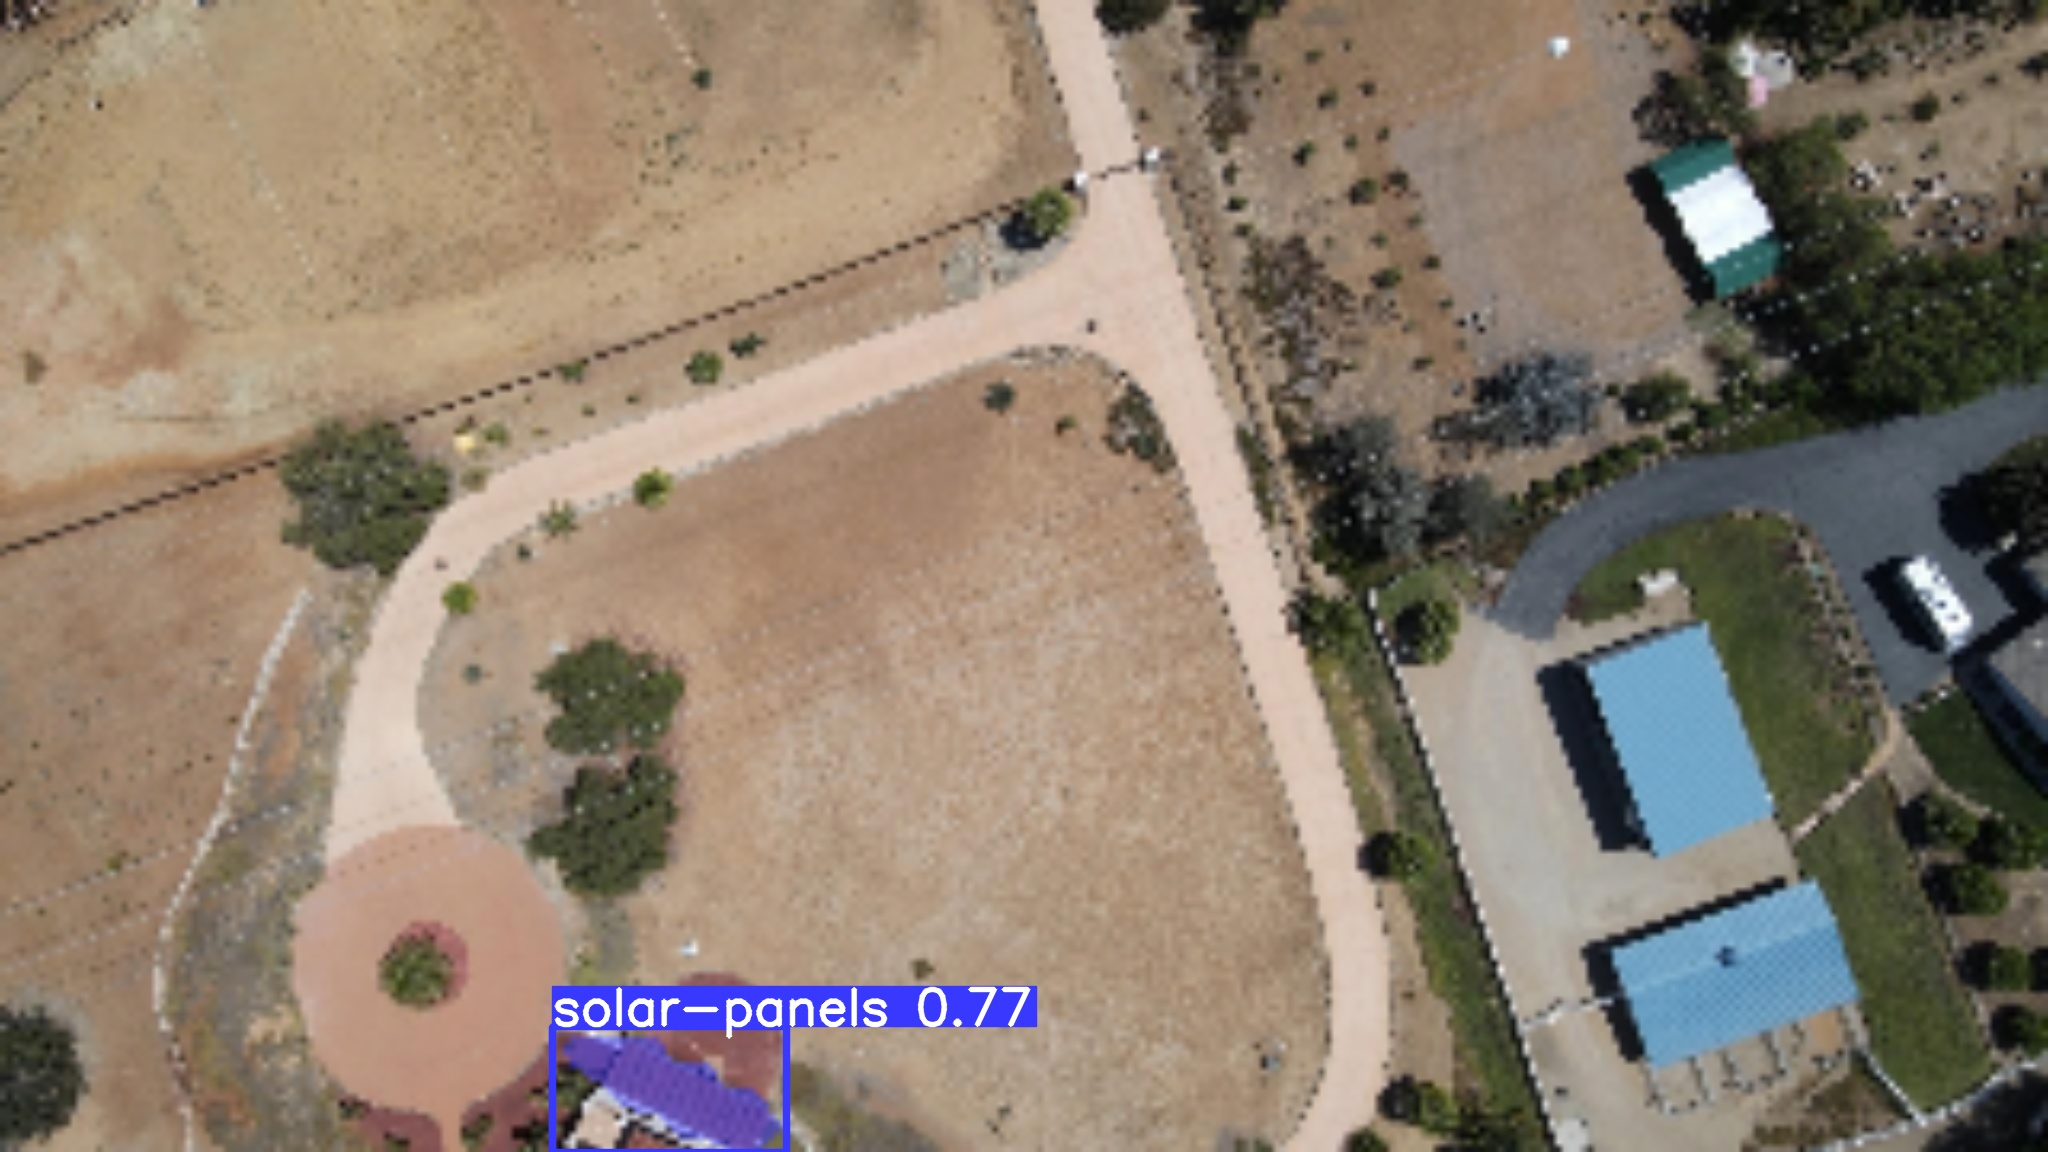


 YoloV8 Segmentation DataFrame Output:


,xmin,xmax,name,ymax,ymin,confidence,class_id
0,552.719727,786.887878,solar-panels,1152.0,1026.313599,0.769818,0


In [128]:
response_show(image, response)